In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# we have to read the dataset of the company data to move further operations.
data = pd.read_csv("50_Startups.csv")

In [3]:
# first 5 rows of the dataset.
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

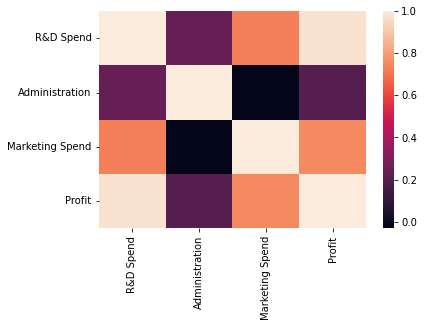

In [4]:
# we will visualize the the dataset to know how the profit of the company vary with different factors.
sns.heatmap(data.corr())

One-hot encoding converts the categorical data into numeric data by splitting the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value. 

In [41]:
x = data.iloc[:,:-2]
y = data.loc[:,("Profit")]

In [42]:
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


LabelEncoder approach is very simple and it involves converting each value in a column into a number. 

In [43]:
#Encoding the catagorical data.
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [44]:
# labelencoder = LabelEncoder()
# x.iloc[:,3]= labelencoder.fit_transform(x.iloc[:,3]) # label encoding for the categorical column only.
# onehotencoder = OneHotEncoder()
# x = onehotencoder.fit_transform(x).toarray()


In [45]:
#  avoiding the dummy variable trap
# x = x[:,1:]
# to remove the one extra column we putted due to LabelEncoding and OneHotEncoding.

Actually we don't have to make the categorical data to numeric data since the Nation variable doesn't making any impact
on proft. So we can simply omit it from independent data list. But if we need to change or convert then i have written the code
above.


SPLITTING THE DATA INTO TRAIN AND TEST DATA.

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state = 0)

Fitting the linear regression model.

In [47]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [48]:
# now predicting the train profit
y_pred = lreg.predict(x_test)

In [49]:
y_pred

array([103904.50726357, 134873.34675489, 135702.26227519,  71381.86533451,
       183439.9051723 , 114093.81566602,  65158.88820163,  98511.77787691,
       114322.75500917, 172681.41313094,  96175.0091429 ,  87672.99352009,
       111474.47287539,  89356.12148989, 128894.78808634, 162567.02630001,
       152321.76328738,  45269.3379874 ,  43637.56806053, 102758.34387422,
       147337.78618165,  98694.62078122,  98957.96200965, 116686.69190514,
        67575.80508999])

As we know the mathematical terms or formlulas for linear regression is
Y = mx + c
here,
Y = Dependent variable
m = slope
c = coefficient

we have the coefficient and we will calculate the co-efficient.

In [50]:
#the co-efficeint 
print(lreg.coef_)

[0.84085046 0.01654303 0.02554206]


In [51]:
#calculating the intercept
print(lreg.intercept_)

42325.796742223276


EVALUATING THE MODEL

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9206462134138824

we have accuracy around 92% so we can say our model is a success..........